In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # 텐서플로우 버전 1로 낮추기 (버전 2 기능 사용불가하게 만들기)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Instructions for updating:
non-resource variables are not supported in the long term


In [40]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

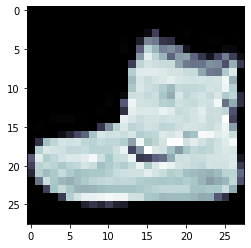

In [41]:
xtrain.shape
plt.imshow(xtrain[0], plt.cm.bone)

In [43]:
xtrain = xtrain.reshape(60000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0

In [46]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [35]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [45]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [39]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [65]:
# 2.모델 구성 (딥러닝 : 신경망모델 : 입력계층/히든계층/출력계층)
model = Sequential()

# 레이어설계 (input_dim : 입력데이터의 생김새)
# 입력:784, 출력 : 2인 레이어 추가 (add)
model.add(Dense( units=256, input_dim = 28*28, activation='relu' )) # 입력계층
# 히든계층 (입력계층의 units를 input으로 받아옴)
model.add(Dense( units=128, activation='relu' ))
model.add(Dense( units=64, activation='relu' ))
model.add(Dense( units=10, activation='softmax' ))

In [66]:
# 3. 모델 학습과정 설정 # https://keras.io/ko
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']) # loss에는 cost 함수써줌

In [67]:
# 4. 모델 학습시키기
hist = model.fit(xtrain, ytrain, batch_size=64, epochs=80)
"""
# verbose : 진행 바
# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.
모델을 학습하다가 더이상 좋아지지 않으면(상태)
모델링중단하도록 함.
"""

Train on 60000 samples
Epoch 1/80
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4986 - acc: 0.8204
Epoch 2/80
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3610 - acc: 0.8679
Epoch 3/80
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3267 - acc: 0.8800
Epoch 4/80
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3041 - acc: 0.8866
Epoch 5/80
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2873 - acc: 0.8926
Epoch 6/80
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2719 - acc: 0.8973
Epoch 7/80
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2595 - acc: 0.9025
Epoch 8/80
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2500 - acc: 0.9051
Epoch 9/80
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2385 - acc: 0.9102
Epoch 10/80
60000/60000 [==============================] - 

'\n# verbose : 진행 바\n# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.\n모델을 학습하다가 더이상 좋아지지 않으면(상태)\n모델링중단하도록 함.\n'

In [53]:
hist.history.keys()

dict_keys(['loss', 'acc'])

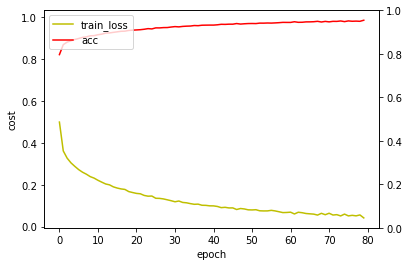

In [68]:
fig, axes = plt.subplots()
accax = axes.twinx()
axes.plot(hist.history['loss'], 'y', label='train_loss')
axes.plot(hist.history['acc'], 'r', label='acc')
axes.set_xlabel('epoch')
axes.set_ylabel('cost')
axes.legend(loc="upper left")

plt.show()

In [69]:
# 모델 평가하기
model.evaluate(xtest, ytest, batch_size=32)

[0.8414331160219619, 0.8923]

In [71]:
ytest[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
import numpy as np
# 모델 사용하기 (분류)
yhat = model.predict(xtest[0:3])
np.sum(yhat[0])
np.max(yhat[0])
print(np.argmax(yhat[0]))
print(np.argmax(yhat[1]))
print(np.argmax(yhat[2]))

9
2
1


In [74]:
# 모델 사용하기 (분류)
yhat = model.predict(xtest[0:3])
np.sum(yhat[0])
np.max(yhat[0])
print(np.argmax(yhat[1]))
print(np.argmax(yhat[2]))

2
1
